## Data Exploration 01: Comparison of Men's vs Women's Matches

Rule-wise, the only difference between the men's and women's volleyball matches is the height of the net (2.43 m for men and 2.24 m for women). However, the men's spikes tend to be more powerful while the women's spikes tend to attack at a specific spot. As such, women's volleyball tends to have longer rallies and more opportunities to attack.

Let's see if this is the case with the data we got.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format

In [2]:
team_df = pd.read_csv("../data/team_stats.csv")
player_df = pd.read_csv("../data/player_stats.csv")

### ACTIONS PER SET
We want to explore if we can see a difference between the men's and women's matches in terms of actions done (attacks, blocks, serves, etc.). <br>
We'll also compare the amount of points won (for attacks, blocks and serves) and excellent attempts (for receives, digs and sets). <br>

Because the amount of sets played differs between the men's and women's tournaments, we will use the actions per set rather than the total actions done.

In [3]:
# player_df contains the data for the attempts

player_df.head()

,name,nationality,position,division,opponent,match_date,phase,sets_won,sets_played,points_scored,...,rec_attempts,rec_total,dig_excellents,dig_faults,dig_attempts,dig_total,set_excellents,set_faults,set_stills,set_total
0,Matias SANCHEZ,Argentina,Setter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,2,0,1,3
1,Joaquin GALLEGO,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,2,4,1,2,2,5,0,0,2,2
2,Agustin LOSER,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,1,1,4,1,3,8,0,0,0,0
3,Santiago DANANI,Argentina,Libero,Men,United States,2022-07-10,Pool,2,5,0,...,9,21,12,4,2,18,0,0,6,6
4,Nicolás LAZO,Argentina,Outside Hitter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
player_df.columns

Index(['name', 'nationality', 'position', 'division', 'opponent', 'match_date',
       'phase', 'sets_won', 'sets_played', 'points_scored', 'attack_kills',
       'attack_faults', 'attack_shots', 'attack_total', 'block_kills',
       'block_faults', 'block_rebounds', 'block_total', 'serve_aces',
       'serve_errors', 'serve_attempts', 'serve_total', 'rec_excellents',
       'rec_faults', 'rec_attempts', 'rec_total', 'dig_excellents',
       'dig_faults', 'dig_attempts', 'dig_total', 'set_excellents',
       'set_faults', 'set_stills', 'set_total'],
      dtype='object')

In [5]:
# Getting the sets played per division.

sets_played = player_df.groupby(['nationality', 'division', 'opponent', 'phase'], as_index=False)['sets_played'].first()
sets_played = sets_played.groupby('division').sum()
sets_played

,sets_played
division,
Men,750
Women,780


In [6]:
# Getting the total kills/excellents and attempts

cols = ['attack_kills', 'attack_total', 'block_kills', 'block_total', 'serve_aces', 'serve_total', 
        'rec_excellents', 'rec_total', 'dig_excellents', 'dig_total', 'set_excellents', 'set_total']

attempts_df = player_df.groupby(['nationality', 'division', 'opponent', 'phase'], as_index=False)[cols].sum()
attempts_df = attempts_df.groupby('division').sum()

# Appending the sets played

attempts_df['sets_played'] = sets_played['sets_played']
attempts_df

,attack_kills,attack_total,block_kills,block_total,serve_aces,serve_total,rec_excellents,rec_total,dig_excellents,dig_total,set_excellents,set_total,sets_played
division,,,,,,,,,,,,,
Men,9388,18743,1414,7890,1005,16758,3367,13586,5160,8709,5361,18507,750
Women,10497,25768,1753,9050,767,17088,5397,15303,9865,14022,5320,24976,780


In [7]:
# Getting the per set statistics

attempts_df = attempts_df.iloc[:,:-1].div(attempts_df['sets_played'], axis=0)
attempts_df

,attack_kills,attack_total,block_kills,block_total,serve_aces,serve_total,rec_excellents,rec_total,dig_excellents,dig_total,set_excellents,set_total
division,,,,,,,,,,,,
Men,12.52,24.99,1.89,10.52,1.34,22.34,4.49,18.11,6.88,11.61,7.15,24.68
Women,13.46,33.04,2.25,11.60,0.98,21.91,6.92,19.62,12.65,17.98,6.82,32.02


In [8]:
# Separate out the kills/excellents to the attempts. The kills/excellents are all even columns so we can use that.
# We'll also reshape the data for plotting.

kills_df = attempts_df.iloc[:, ::2].reset_index().melt(id_vars='division', var_name='action', value_name='num_per_set')
kills_df

,division,action,num_per_set
0,Men,attack_kills,12.52
1,Women,attack_kills,13.46
2,Men,block_kills,1.89
3,Women,block_kills,2.25
4,Men,serve_aces,1.34
5,Women,serve_aces,0.98
6,Men,rec_excellents,4.49
7,Women,rec_excellents,6.92
8,Men,dig_excellents,6.88
9,Women,dig_excellents,12.65


In [9]:
# Do the same to get the totals

totals_df = attempts_df.iloc[:, 1::2].reset_index().melt(id_vars='division', var_name='action', value_name='num_per_set')
totals_df

,division,action,num_per_set
0,Men,attack_total,24.99
1,Women,attack_total,33.04
2,Men,block_total,10.52
3,Women,block_total,11.60
4,Men,serve_total,22.34
5,Women,serve_total,21.91
6,Men,rec_total,18.11
7,Women,rec_total,19.62
8,Men,dig_total,11.61
9,Women,dig_total,17.98


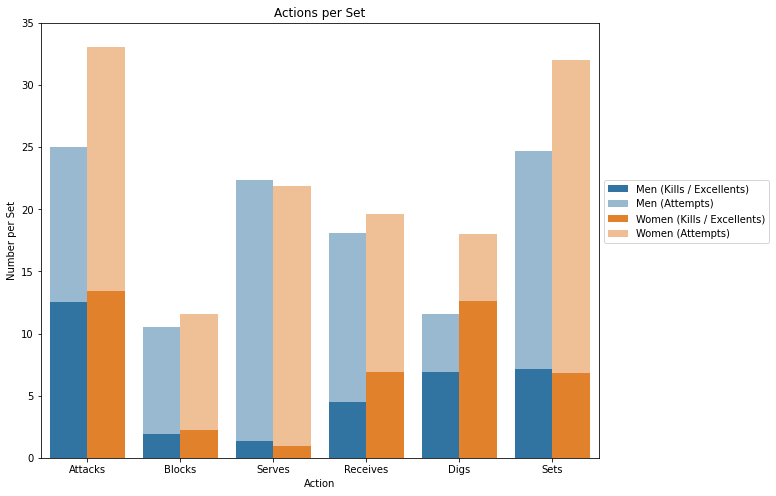

In [10]:
plt.figure(figsize=(10, 8))

ax = sns.barplot(data=kills_df, x='action', y='num_per_set', hue='division')
ax = sns.barplot(data=totals_df, x='action', y='num_per_set', hue='division', alpha=0.5)

ax.set_xticklabels(['Attacks', 'Blocks', 'Serves', 'Receives', 'Digs', 'Sets'])

plt.title('Actions per Set')
plt.xlabel('Action')
plt.ylabel('Number per Set')
plt.ylim(0,35)

handles, _ = plt.gca().get_legend_handles_labels()
labels = ['Men (Kills / Excellents)', 'Men (Attempts)', 'Women (Kills / Excellents)', 'Women (Attempts)']

order = [0, 2, 1, 3]

ax.legend([handles[idx] for idx in order], labels, bbox_to_anchor=(1, 0.65)) 

plt.savefig('../graphs/actions_per_set.jpg', bbox_inches='tight')
plt.show()

In [11]:
# Let's also look into kill / excellent percentage

kills_df['%'] = 100 * kills_df['num_per_set'] / totals_df['num_per_set']
kills_df

,division,action,num_per_set,%
0,Men,attack_kills,12.52,50.09
1,Women,attack_kills,13.46,40.74
2,Men,block_kills,1.89,17.92
3,Women,block_kills,2.25,19.37
4,Men,serve_aces,1.34,6.00
5,Women,serve_aces,0.98,4.49
6,Men,rec_excellents,4.49,24.78
7,Women,rec_excellents,6.92,35.27
8,Men,dig_excellents,6.88,59.25
9,Women,dig_excellents,12.65,70.35


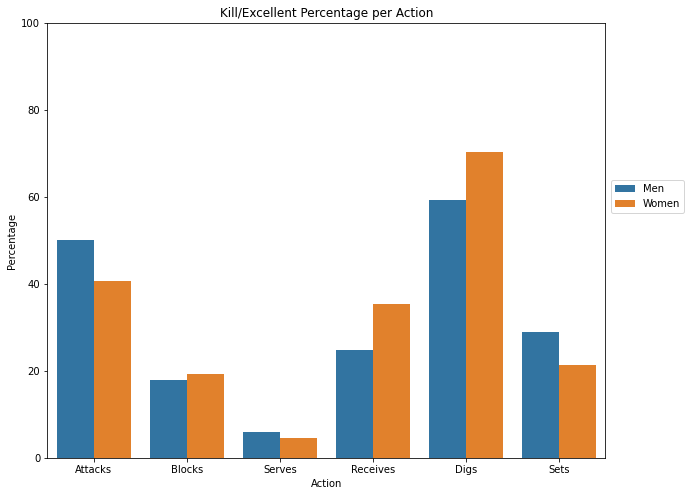

In [12]:
plt.figure(figsize=(10, 8))

ax = sns.barplot(data=kills_df, x='action', y='%', hue='division')

ax.set_xticklabels(['Attacks', 'Blocks', 'Serves', 'Receives', 'Digs', 'Sets'])

plt.title('Kill/Excellent Percentage per Action')
plt.xlabel('Action')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.15, 0.65)) 

plt.savefig('../graphs/kill_excellent_percent.jpg', bbox_inches='tight')
plt.show()

**Analysis:**
- Attacks - Women have significantly more attack attempts per set but the men have the better attack kill percentage.
    This can mean that the women's attacks are being dug up more often leading to more attack attempts.
- Blocks - The attempts and percentage is quite even for the men and women with the women just blocking more.
- Serves - Similarly, the stats for service is quite even for both men and women with the men serving more aces.
- Receives - The men have less receives than the women despite having more serve attempts which I assume is due to the men committing more service errors. We can also see the women having significantly better receives.
- Digs - As expected, the women have significantly more dig attempts and dig efficiency.
- Sets - Because of the women have more digs, it follows that they will have more attempts to set the ball but percentage-wise, the men have more excellent sets which makes sense because longer rallies will have more out-of-system plays.

### Error Analysis

Let's also compare our data with errors committed especially for service errors.

In [13]:
# team_df contains our data for total errors
team_df.head()

,team,opponent,division,phase,sets_won,sets_played,sets_scores,team_attacks,team_blocks,team_aces,opp_errors,team_total_points,team_digs,team_receptions,team_sets,team_err_committed,opp_points
0,Bulgaria,Serbia,Men,Pool,1,4,"[25, 19, 22, 20]",52,15,3,16,86,56,85,98,28,94
1,Serbia,Bulgaria,Men,Pool,3,4,"[19, 25, 25, 25]",54,4,8,28,94,76,74,105,16,86
2,China,Iran,Men,Pool,1,4,"[15, 25, 22, 15]",44,6,5,22,77,30,78,59,25,94
3,Iran,China,Men,Pool,3,4,"[25, 19, 25, 25]",48,7,14,25,94,39,65,63,22,77
4,Canada,Germany,Men,Pool,0,3,"[19, 20, 28]",37,4,4,22,67,42,62,77,23,80


In [14]:
# player_df contains data for service errors
player_df.head()

,name,nationality,position,division,opponent,match_date,phase,sets_won,sets_played,points_scored,...,rec_attempts,rec_total,dig_excellents,dig_faults,dig_attempts,dig_total,set_excellents,set_faults,set_stills,set_total
0,Matias SANCHEZ,Argentina,Setter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,2,0,1,3
1,Joaquin GALLEGO,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,2,4,1,2,2,5,0,0,2,2
2,Agustin LOSER,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,1,1,4,1,3,8,0,0,0,0
3,Santiago DANANI,Argentina,Libero,Men,United States,2022-07-10,Pool,2,5,0,...,9,21,12,4,2,18,0,0,6,6
4,Nicolás LAZO,Argentina,Outside Hitter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
player_df.columns

Index(['name', 'nationality', 'position', 'division', 'opponent', 'match_date',
       'phase', 'sets_won', 'sets_played', 'points_scored', 'attack_kills',
       'attack_faults', 'attack_shots', 'attack_total', 'block_kills',
       'block_faults', 'block_rebounds', 'block_total', 'serve_aces',
       'serve_errors', 'serve_attempts', 'serve_total', 'rec_excellents',
       'rec_faults', 'rec_attempts', 'rec_total', 'dig_excellents',
       'dig_faults', 'dig_attempts', 'dig_total', 'set_excellents',
       'set_faults', 'set_stills', 'set_total'],
      dtype='object')

In [16]:
# Let's get the total service errors per match by using groupby.
error_df = player_df.groupby(['nationality', 'division', 'opponent', 'phase'], as_index=False)['serve_errors'].sum()

# We use a merge to get the 'team_err_committed' and 'sets_played' from team_df
error_df = error_df.merge(team_df[['team', 'division', 'opponent', 'phase', 'team_err_committed', 'sets_played']], 
                          left_on=['nationality', 'division', 'opponent', 'phase'], 
                          right_on=['team', 'division', 'opponent', 'phase']).drop('team', axis=1)
error_df

,nationality,division,opponent,phase,serve_errors,team_err_committed,sets_played
0,Argentina,Men,Australia,Pool,14,26,4
1,Argentina,Men,Canada,Pool,20,29,4
2,Argentina,Men,China,Pool,21,29,4
3,Argentina,Men,France,Pool,25,35,4
4,Argentina,Men,Germany,Pool,12,21,4
...,...,...,...,...,...,...,...
409,United States,Women,Poland,Pool,3,10,3
410,United States,Women,Serbia,Pool,4,11,3
411,United States,Women,Serbia,Quarterfinals,8,22,5
412,United States,Women,Thailand,Pool,12,27,4


In [17]:
# Getting the percentage of serve errors
error_df = error_df.groupby('division').sum()
error_df = error_df.iloc[:,:-1].div(error_df['sets_played'], axis=0)
error_df['% serve errors'] = 100 * error_df['serve_errors'] / error_df['team_err_committed'] 
error_df

,serve_errors,team_err_committed,% serve errors
division,,,
Men,4.22,6.59,64.12
Women,2.23,5.23,42.59


In [18]:
# Reshaping the dataframe for plotting
error_df = error_df.reset_index().melt(id_vars='division', var_name='errors', value_name='err_per_set')
error_df

,division,errors,err_per_set
0,Men,serve_errors,4.22
1,Women,serve_errors,2.23
2,Men,team_err_committed,6.59
3,Women,team_err_committed,5.23
4,Men,% serve errors,64.12
5,Women,% serve errors,42.59


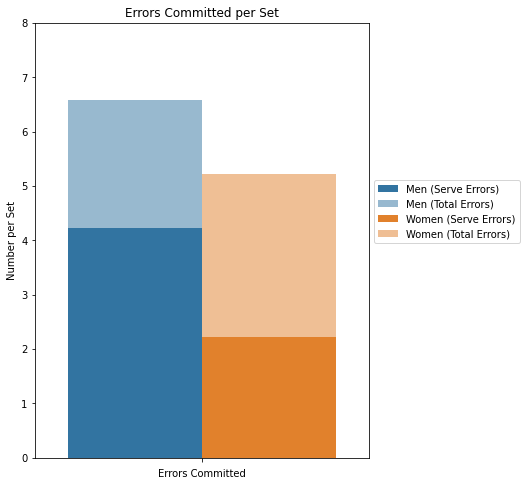

In [19]:
plt.figure(figsize=(6, 8))

ax = sns.barplot(data=error_df[error_df['errors']=='serve_errors'], x='errors', y='err_per_set', hue='division')
ax = sns.barplot(data=error_df[error_df['errors']=='team_err_committed'], x='errors', y='err_per_set', hue='division', alpha=0.5)

ax.set_xticklabels([''])

plt.title('Errors Committed per Set')
plt.xlabel('Errors Committed')
plt.ylabel('Number per Set')
plt.ylim(0,8)

handles, _ = plt.gca().get_legend_handles_labels()
labels = ['Men (Serve Errors)', 'Men (Total Errors)', 'Women (Serve Errors)', 'Women (Total Errors)']

order = [0, 2, 1, 3]

ax.legend([handles[idx] for idx in order], labels, bbox_to_anchor=(1, 0.65)) 

plt.savefig('../graphs/errors_per_set.jpg', bbox_inches='tight')
plt.show()

**Analysis:**<br>
The men commit more errors per set than the women. The rate of serve errors is also significantly higher for the men (64.12% vs 42.59%). 
This can be attributed to the higher net and for the men using stronger and faster but riskier serves.